In [1]:
import numpy as np
import matplotlib.pyplot as plt

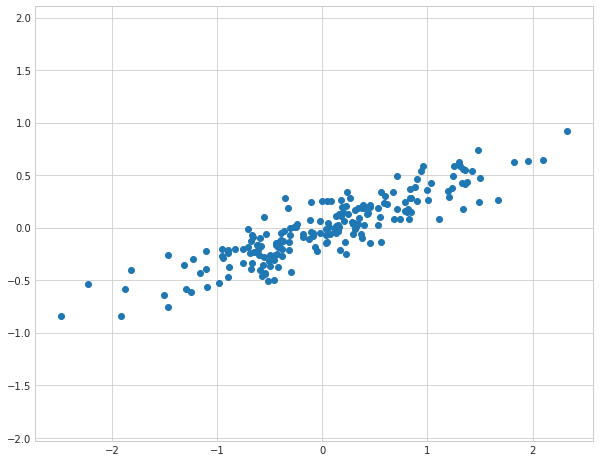

In [2]:
X = np.genfromtxt('PCA.csv',delimiter=',')
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10,8))
    plt.scatter(X[:, 0], X[:, 1])
    plt.axis('equal');

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [4]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [5]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


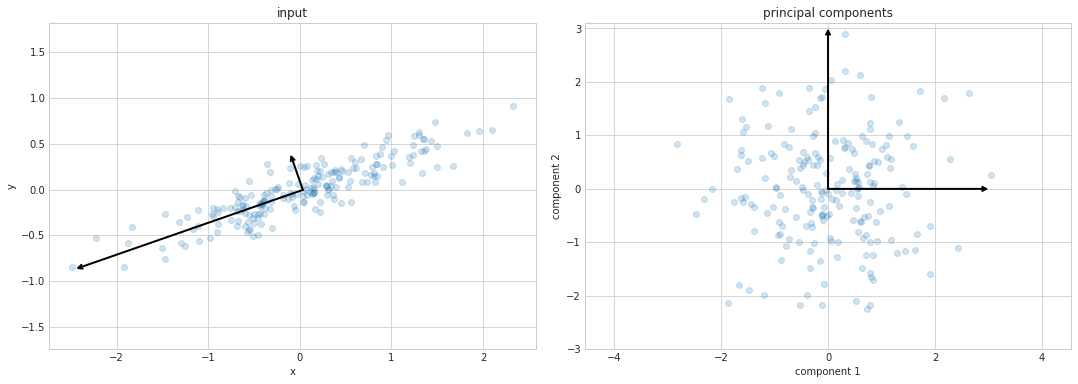

In [6]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
pca = PCA(n_components=2, whiten=True)
pca.fit(X)
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

    # plot data
    ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
    for length, vector in zip(pca.explained_variance_, pca.components_):
        v = vector * 3 * np.sqrt(length)
        draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
    ax[0].axis('equal');
    ax[0].set(xlabel='x', ylabel='y', title='input')

    # plot principal components
    X_pca = pca.transform(X)
    ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
    draw_vector([0, 0], [0, 3], ax=ax[1])
    draw_vector([0, 0], [3, 0], ax=ax[1])
    ax[1].axis('equal')
    ax[1].set(xlabel='component 1', ylabel='component 2',
              title='principal components',
              xlim=(-5, 5), ylim=(-3, 3.1))

In [7]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


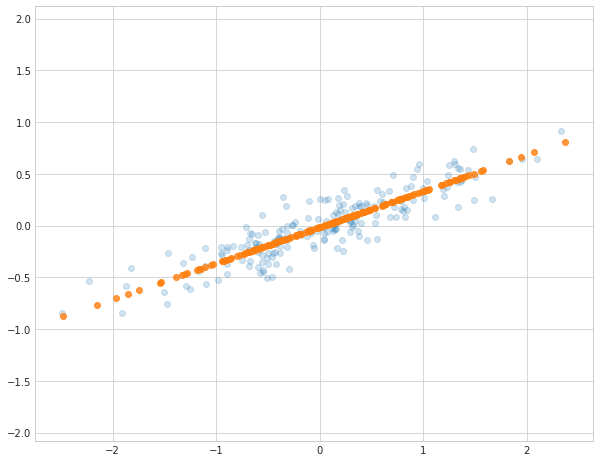

In [107]:
X_new = pca.inverse_transform(X_pca)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10,8))
    plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
    plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
    plt.axis('equal');

In [108]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [109]:
X = df.ix[:,0:4].values;
y = df.ix[:,4].values;

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


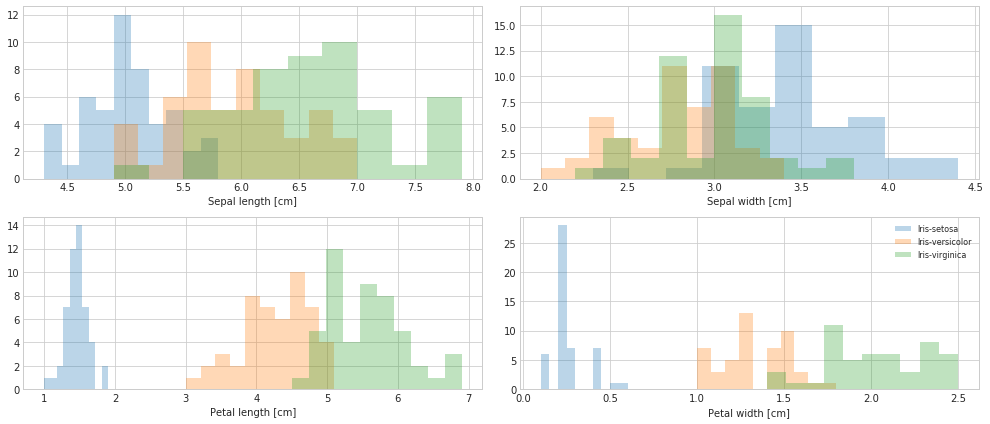

In [110]:
from matplotlib import pyplot as plt
import numpy as np
import math

def plot_histograms(X, y):
  label_dict = {1: 'Iris-Setosa',
                2: 'Iris-Versicolor',
                3: 'Iris-Virgnica'}

  feature_dict = {0: 'Sepal length [cm]',
                  1: 'Sepal width [cm]',
                  2: 'Petal length [cm]',
                  3: 'Petal width [cm]'}

  with plt.style.context('seaborn-whitegrid'):
      plt.figure(figsize=(14, 6))
      for cnt in range(4):
          plt.subplot(2, 2, cnt+1)
          for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
              plt.hist(X[y==lab, cnt],
                       label=lab,
                       bins=10,
                       alpha=0.3,)
          plt.xlabel(feature_dict[cnt])
      plt.legend(loc='upper right', fancybox=True, fontsize=8)

      plt.tight_layout()
      plt.show()

plot_histograms(X, y)

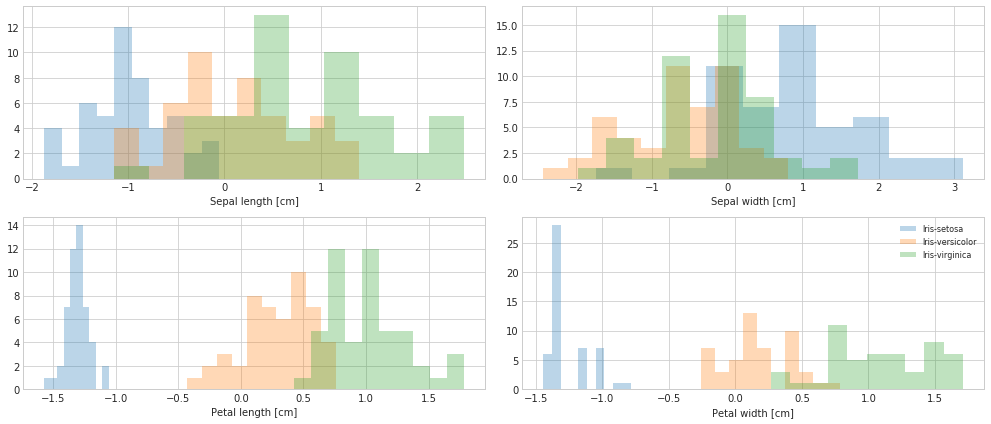

In [111]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
plot_histograms(X_std, y)

In [112]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print("Covariance matrix: \n%s" %cov_mat )

Covariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [31]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [32]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.9303537755893156
0.9274036215173419
0.14834222648164008
0.02074601399559599


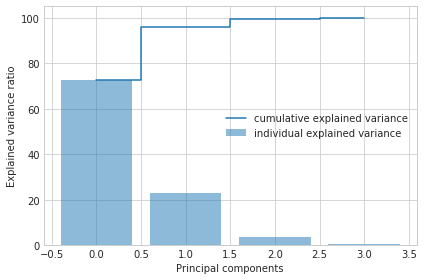

In [33]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()


In [34]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n %s' %matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


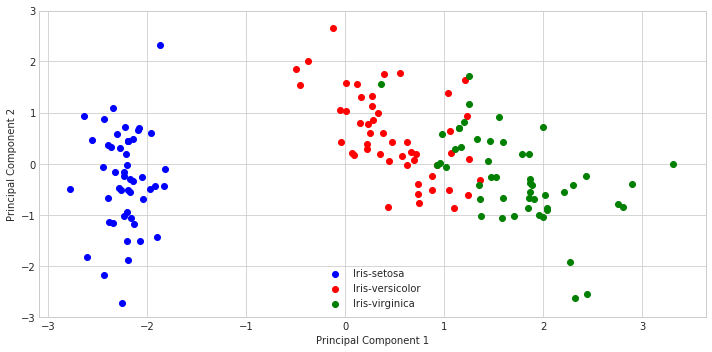

In [35]:
Y = X_std.dot(matrix_w)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 5))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), 
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()



# Autoencoders for dimensionality reduction

In [52]:
from keras.datasets import fashion_mnist
(data, labels), (_, _) = fashion_mnist.load_data()

In [53]:
data = data.reshape(-1, 28*28) / 255.

In [59]:
from keras import models, layers
def dim_red_ae(data,n_dims_encoded=2):
    input_layer = layers.Input(shape=(28*28,))
    encoding_layer = layers.Dense(n_dims_encoded,activation='tanh')(input_layer)
    decoding_layer = layers.Dense(28*28,activation='tanh') (encoding_layer)
    autoencoder = models.Model(input_layer, decoding_layer)
    autoencoder.compile('adam', loss='mse')
    autoencoder.fit(x = data, y = data, epochs=5)
    encoder = models.Model(input_layer, encoding_layer)
    return encoder,autoencoder

In [60]:
encoder,autoencoder = dim_red_ae(data,n_dims_encoded=2)
encodings = encoder.predict(data)

Epoch 1/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.0633
Epoch 2/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.0473
Epoch 3/5
60000/60000 [==============================] - 4s 59us/step - loss: 0.0467
Epoch 4/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.0464
Epoch 5/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.0463


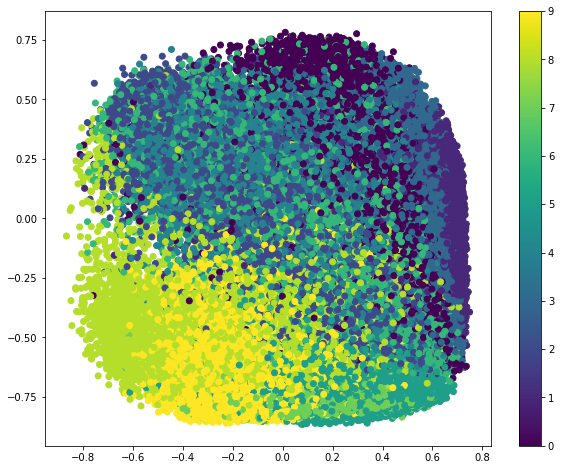

In [46]:
plt.figure(figsize=(10,8))
plt.scatter(encodings[:, 0], encodings[:, 1], c=labels)
plt.colorbar()

<Figure size 720x720 with 0 Axes>

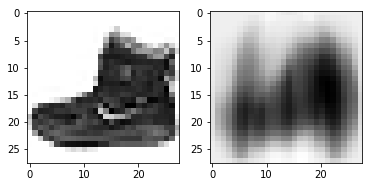

In [81]:
img = autoencoder.predict(data)
img = img[0].reshape(28,28)
plt.figure(figsize=(10, 10))
fig,ax = plt.subplots(1,2)
ax[0].imshow(data[0].reshape(28,28),cmap="Greys")
ax[1].imshow(img, cmap="Greys")

Epoch 1/5
60000/60000 [==============================] - 7s 121us/step - loss: 0.0189
Epoch 2/5
60000/60000 [==============================] - 8s 132us/step - loss: 0.0111
Epoch 3/5
60000/60000 [==============================] - 7s 123us/step - loss: 0.0104
Epoch 4/5
60000/60000 [==============================] - 6s 103us/step - loss: 0.0101
Epoch 5/5
60000/60000 [==============================] - 7s 111us/step - loss: 0.0099 0s - loss:


<Figure size 720x720 with 0 Axes>

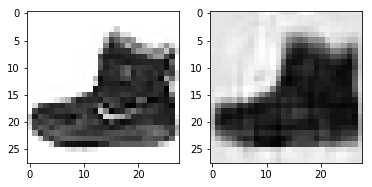

In [84]:
encoder,autoencoder = dim_red_ae(data,n_dims_encoded=100)
img = autoencoder.predict(data)
img = img[0].reshape(28,28)
plt.figure(figsize=(10, 10))
fig,ax = plt.subplots(1,2)
ax[0].imshow(data[0].reshape(28,28),cmap="Greys")
ax[1].imshow(img, cmap="Greys")

In [55]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(data[:10000],labels[:10000])

In [56]:
import time
start = time.time()
model1 = KNeighborsClassifier().fit(X_train,y_train)
end = time.time()
print(end - start)
print(acc)

24.644946813583374
0.8252


In [50]:
from sklearn.model_selection import cross_val_score
acc_list = []
possible_dims = [2,5,7,10,15,20]
for dims in possible_dims:
    print("training for %d dimensions"%dims)
    encoder = dim_red_ae(X_train,dims)
    encodings = encoder.predict(X_train)
    clf = KNeighborsClassifier().fit(encodings,y_train)
    scores = cross_val_score(clf, encodings, y_train, cv=5)
    acc_list.append(np.mean(scores))
    print("for %d dims scores are :"%dims,scores)
    print("=========================================")
best_dim = possible_dims[np.argmax(acc_list)]

training for 2 dimensions
Epoch 1/5
60000/60000 [==============================] - 3s 56us/step - loss: 0.0633
Epoch 2/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.0473
Epoch 3/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.0467: 0s - loss: 0.046
Epoch 4/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.0464
Epoch 5/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.0463
for 2 dims scores are : [0.51994681 0.5        0.52835223 0.51468625 0.52839011]
training for 5 dimensions
Epoch 1/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.0483
Epoch 2/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.0350
Epoch 3/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.0341
Epoch 4/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.0338
Epoch 5/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.0336

In [51]:
encoder = dim_red_ae(X_train,best_dim)
encodings = encoder.predict(X_train)
import time
start = time.time()
model1 = KNeighborsClassifier().fit(encodings,y_train)
acc = accuracy_score(model1.predict(encoder.predict(X_test)),y_test)
end = time.time()
print(end - start)
print(acc)

Epoch 1/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.0308
Epoch 2/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.0213
Epoch 3/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.0206
Epoch 4/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.0203
Epoch 5/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.0201
0.4252171516418457
0.83
